In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
all_data = pd.read_csv('dataset.csv', index_col=0)
all_data.head()

,Distance(metres),Heartrate(BPM),Speed(m/s),WindSpeed (m/s),Cadaence(revs/s),Elevation(meters),Hill slope(%),Temperature(C),Cluster
Power(watts),,,,,,,,,
0.0,0.000,57.0,1.4305,1.6093,0.0,55.778,-2.85,25.556,C
0.0,0.000,57.0,1.6540,2.9505,0.0,55.778,-4.40,25.556,C
0.0,0.000,57.0,2.5034,3.1740,0.0,55.778,-5.85,25.556,C
0.0,16.093,61.0,2.5034,3.8445,0.0,55.778,-6.30,25.556,C
0.0,16.093,62.0,2.5481,3.2187,0.0,55.778,-5.62,25.556,C


In [ ]:
# not working !!!!!!!!!!!!!
# import seaborn as sns
#  sns.pairplot(data=all_data, hue= 'Cluster')

In [6]:
data = all_data.drop('Cluster', axis=1)
data.head()

,Distance(metres),Heartrate(BPM),Speed(m/s),WindSpeed (m/s),Cadaence(revs/s),Elevation(meters),Hill slope(%),Temperature(C)
Power(watts),,,,,,,,
0.0,0.000,57.0,1.4305,1.6093,0.0,55.778,-2.85,25.556
0.0,0.000,57.0,1.6540,2.9505,0.0,55.778,-4.40,25.556
0.0,0.000,57.0,2.5034,3.1740,0.0,55.778,-5.85,25.556
0.0,16.093,61.0,2.5034,3.8445,0.0,55.778,-6.30,25.556
0.0,16.093,62.0,2.5481,3.2187,0.0,55.778,-5.62,25.556


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4435 entries, 0.0 to 0.0
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Distance(metres)   4432 non-null   float64
 1   Heartrate(BPM)     4430 non-null   float64
 2   Speed(m/s)         4430 non-null   float64
 3   WindSpeed (m/s)    4417 non-null   float64
 4   Cadaence(revs/s)   4431 non-null   float64
 5   Elevation(meters)  4434 non-null   float64
 6   Hill slope(%)      4433 non-null   float64
 7   Temperature(C)     4433 non-null   float64
dtypes: float64(8)
memory usage: 311.8 KB


In [8]:
data.isnull().sum()

Distance(metres)      3
Heartrate(BPM)        5
Speed(m/s)            5
WindSpeed (m/s)      18
Cadaence(revs/s)      4
Elevation(meters)     1
Hill slope(%)         2
Temperature(C)        2
dtype: int64

In [9]:
data[data.isna().any(axis=1)].shape[0]

19

In [10]:
data.dropna(axis=0,inplace=True,how="any")

In [11]:
data.shape[0]

4416

In [12]:
data.describe()

,Distance(metres),Heartrate(BPM),Speed(m/s),WindSpeed (m/s),Cadaence(revs/s),Elevation(meters),Hill slope(%),Temperature(C)
count,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000
mean,13307.788395,134.580163,6.917809,28.918970,1.057718,296.465173,6.225951,67.243646
std,8867.214718,190.761472,3.870101,1504.736198,0.454953,204.078042,195.704475,3009.335998
min,-50000.000000,-5000.000000,0.000000,0.000000,0.000000,48.158000,-14.080000,-273.000000
25%,7048.900000,123.000000,3.352800,2.548100,0.900000,78.334000,-1.540000,20.556000
50%,11072.000000,142.000000,5.900900,5.364500,1.150000,288.340000,2.250000,22.222000
75%,20680.000000,165.000000,9.656000,9.164300,1.383300,506.580000,9.365000,24.444000
max,30626.000000,174.000000,17.926000,100000.000000,2.266700,628.500000,13000.000000,200000.000000


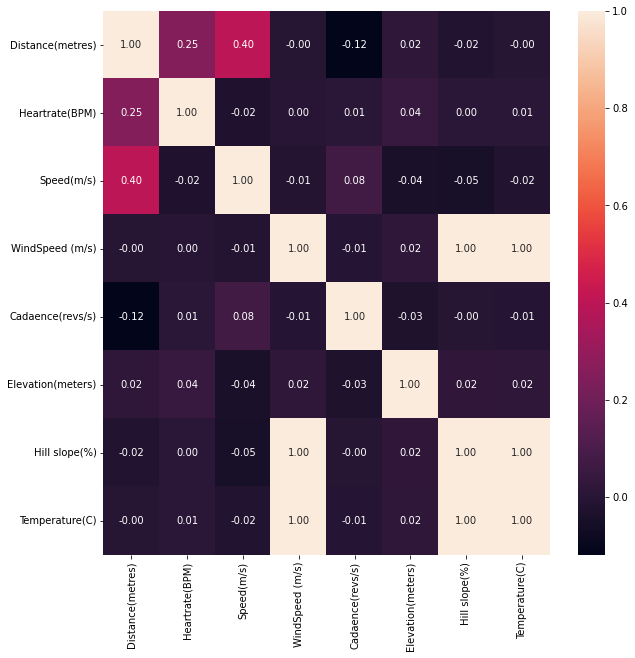

In [13]:
import seaborn as sns

corr_matrix = data.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, ax=ax, annot=True, fmt='.2f')
plt.show()

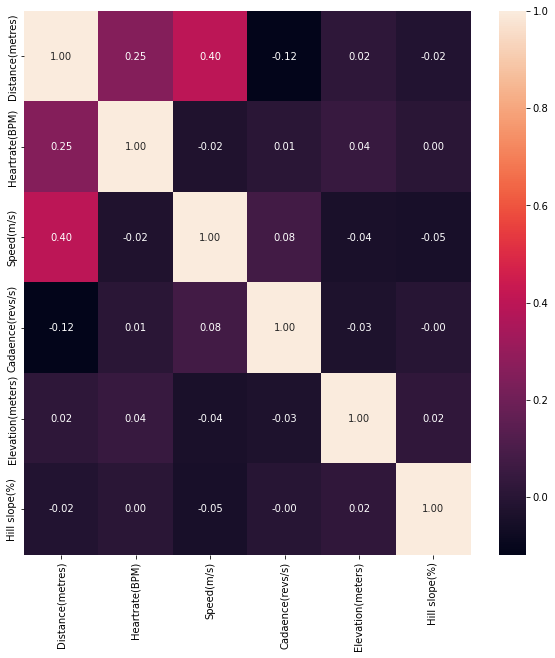

In [14]:
removed_extra_data = data.drop(columns=['WindSpeed (m/s)', 'Temperature(C)'])

corr_matrix = removed_extra_data.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, ax=ax, annot=True, fmt='.2f')
plt.show()

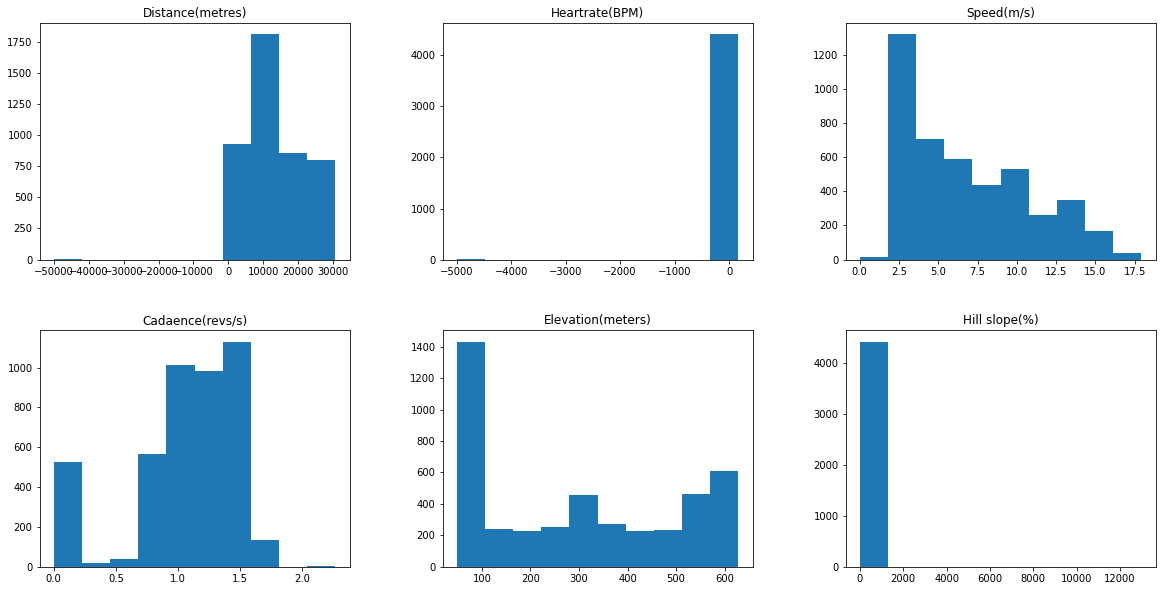

In [15]:
pd.plotting.hist_frame(removed_extra_data, figsize=(20, 10), grid=False, layout=(2, 3))
plt.show()

In [16]:
def fix_outliers(col, fixed_value):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1

    outlier_condition = (col < (Q1 - 1.5 * IQR)) | (col > (Q3 + 1.5 * IQR))
    col.loc[outlier_condition, ] = fixed_value
    return col

removed_outliers_data = removed_extra_data

removed_outliers_data['Distance(metres)'] = fix_outliers(removed_extra_data['Distance(metres)'], removed_extra_data['Distance(metres)'].median())
removed_outliers_data['Heartrate(BPM)'] = fix_outliers(removed_extra_data['Heartrate(BPM)'], removed_extra_data['Heartrate(BPM)'].median())
removed_outliers_data['Hill slope(%)'] = fix_outliers(removed_extra_data['Hill slope(%)'], removed_extra_data['Hill slope(%)'].median())

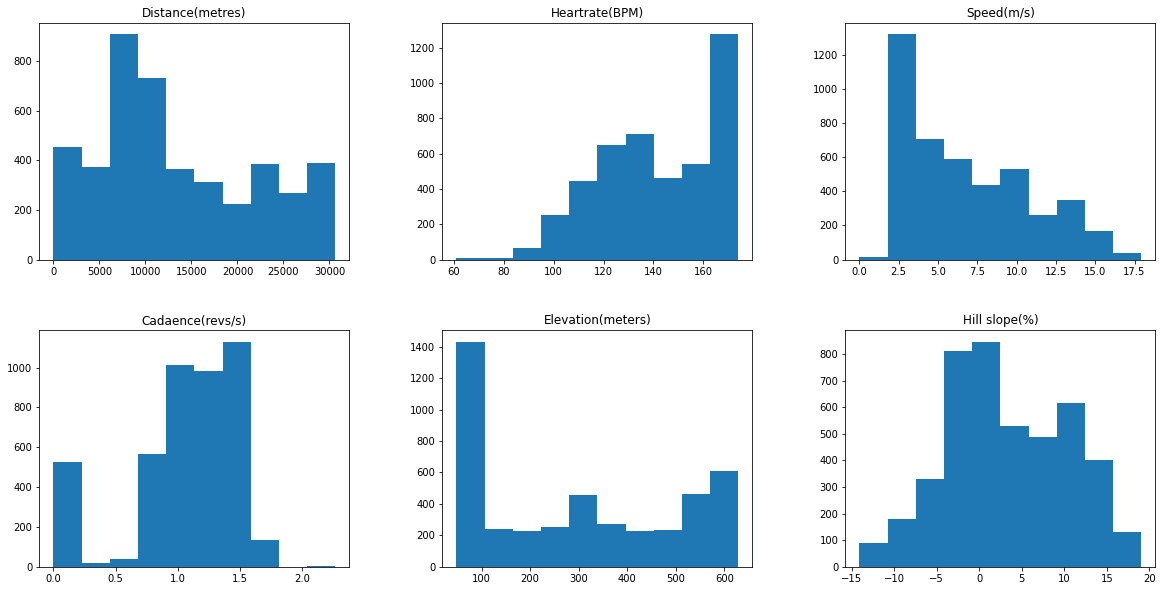

In [ ]:
pd.plotting.hist_frame(removed_outliers_data, figsize=(20, 10), grid=False, layout=(2, 3))
plt.show()

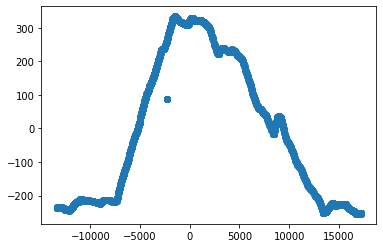

In [17]:
# is this useful ??

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
# pca.fit(removed_outliers_data)

# plt.plot(pca.explained_variance_ratio_)
# pca.components_ 
pca_data = pca.fit_transform(removed_outliers_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cleaned_data = pd.DataFrame(scaler.fit_transform(removed_outliers_data), columns=removed_outliers_data.columns)

cleaned_data

,Distance(metres),Heartrate(BPM),Speed(m/s),Cadaence(revs/s),Elevation(meters),Hill slope(%)
0,0.000000,0.716814,0.079800,0.0,0.01313,0.339172
1,0.000000,0.716814,0.092268,0.0,0.01313,0.292359
2,0.000000,0.716814,0.139652,0.0,0.01313,0.248565
3,0.000525,0.000000,0.139652,0.0,0.01313,0.234974
4,0.000525,0.008850,0.142145,0.0,0.01313,0.255512
...,...,...,...,...,...,...
4411,0.999478,0.345133,0.169580,0.0,0.01103,0.389006
4412,1.000000,0.345133,0.144639,0.0,0.01103,0.371791
4413,1.000000,0.345133,0.094762,0.0,0.01103,0.386288
4414,1.000000,0.336283,0.054864,0.0,0.01103,0.427967


In [29]:
from sklearn.cluster import KMeans
import statsmodels.api as sm
kmeans = KMeans(n_clusters=9, init='k-means++', n_init=10, max_iter=300,)
kmeans.fit(cleaned_data)

KMeans(n_clusters=9)

In [30]:
 kmeans.cluster_centers_

array([[0.09456195, 0.45756915, 0.41184753, 0.51752181, 0.03531829,
        0.44614132],
       [0.72260046, 0.75612576, 0.18857752, 0.40255899, 0.46558726,
        0.68799145],
       [0.33920338, 0.94837576, 0.20611904, 0.47652851, 0.77763888,
        0.70831712],
       [0.60256675, 0.59394937, 0.75042004, 0.00898949, 0.69131113,
        0.1850702 ],
       [0.91237061, 0.73809954, 0.57351602, 0.63047997, 0.04232986,
        0.41740624],
       [0.2441111 , 0.89505219, 0.18523179, 0.44979775, 0.31272016,
        0.76424275],
       [0.75532316, 0.56332217, 0.74387819, 0.63691321, 0.33915975,
        0.26169729],
       [0.96701445, 0.47803848, 0.31129109, 0.1174091 , 0.01889356,
        0.38726624],
       [0.50026539, 0.69811267, 0.48426899, 0.60154003, 0.90448114,
        0.42276554]])

In [40]:
import sys
np.set_printoptions(threshold=sys.maxsize)
kmeans.labels_[:]

4416

In [36]:
kmeans.n_iter_

8

In [41]:
labeled_data = cleaned_data.reindex(kmeans.labels_[:])

In [42]:
# trying to deal with Bcubed evaluation method

,Distance(metres),Heartrate(BPM),Speed(m/s),Cadaence(revs/s),Elevation(meters),Hill slope(%)
0,0.0,0.716814,0.0798,0.0,0.01313,0.339172
0,0.0,0.716814,0.0798,0.0,0.01313,0.339172
0,0.0,0.716814,0.0798,0.0,0.01313,0.339172
0,0.0,0.716814,0.0798,0.0,0.01313,0.339172
0,0.0,0.716814,0.0798,0.0,0.01313,0.339172
